
<center><em>Copyright by Pierian Data Inc.</em></center>


# Supervised Learning Capstone Project - Tree Methods Focus 


In [1]:
# RUN THESE CELLS TO START THE PROJECT! 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
# CODE HERE

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [6]:
# CODE HERE

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [7]:
# CODE HERE

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

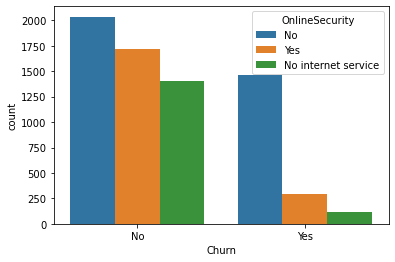

In [9]:
# CODE HERE
sns.countplot(x='Churn',data=df,hue='OnlineSecurity')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

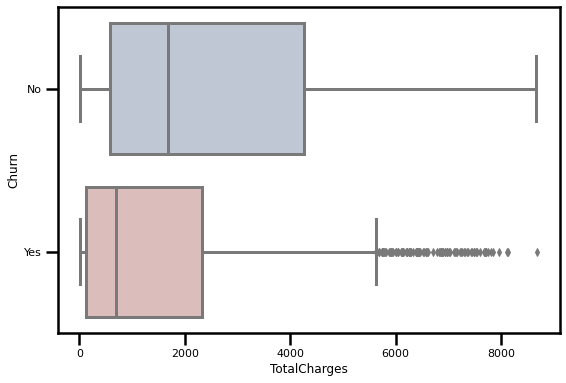

In [10]:
# CODE HERE
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
plt.figure(figsize=(9,6))
sns.boxplot(x='TotalCharges',y='Churn',data=df,palette='vlag')

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

In [11]:
#CODE HERE

<AxesSubplot:xlabel='TotalCharges', ylabel='Contract'>

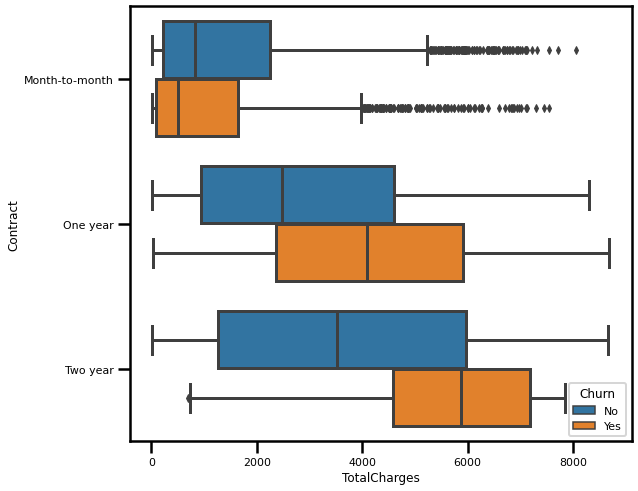

In [12]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
plt.figure(figsize=(9,8))
sns.boxplot(x='TotalCharges',y='Contract',data=df,hue='Churn')

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [13]:
#CODE HERE
df_dummy = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]

dummy = pd.get_dummies(df_dummy).corr()
corr_df =dummy['Churn_Yes'].sort_values(ascending=False)

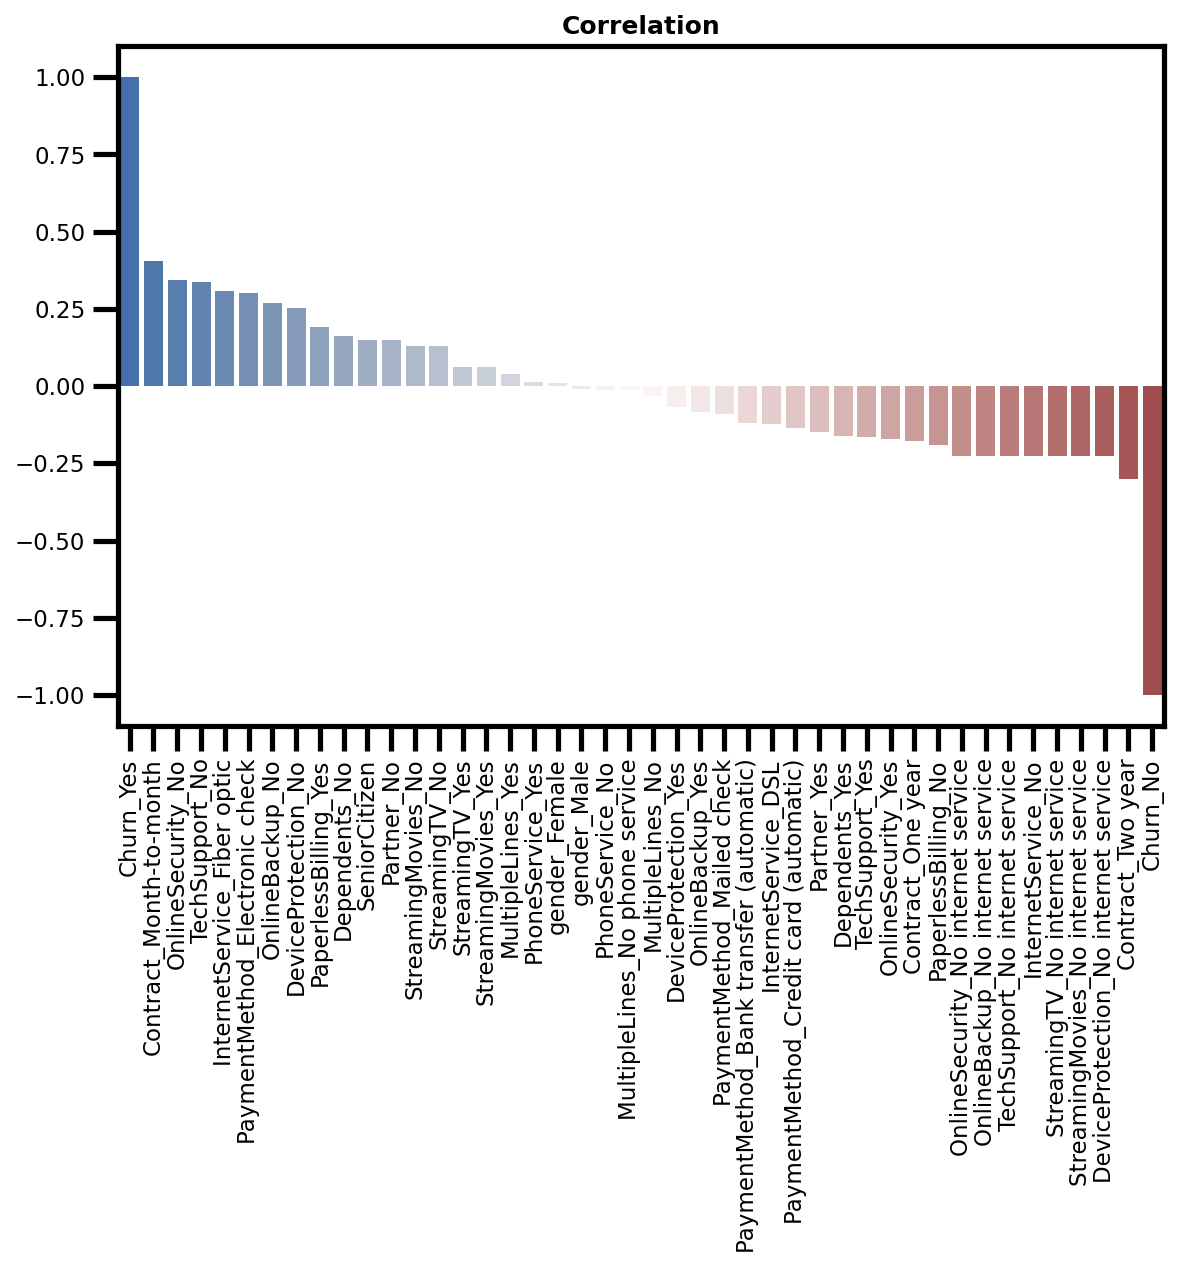

In [29]:
plt.figure(figsize=(9,6),dpi=150)
sns.barplot(x=corr_df.index,y=dummy['Churn_Yes'].sort_values(ascending=False).values,palette='vlag')
plt.xticks(rotation=90);
plt.title('Correlation',fontsize=12,loc='center',weight='bold');

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [34]:
# CODE HERE
df['Contract'].value_counts().index

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')

In [47]:
df.tenure.sort_values()

0        1
6624     1
4283     1
6614     1
1366     1
        ..
912     72
915     72
4566    72
5611    72
3537    72
Name: tenure, Length: 7032, dtype: int64

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

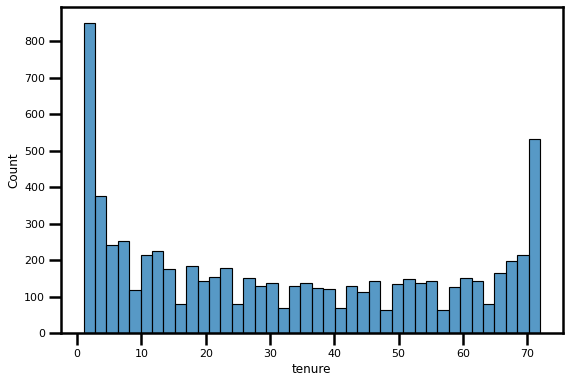

In [45]:
#CODE HERE
plt.figure(figsize=(9,6))
sns.histplot(x=df.tenure,kde=False,bins=40);
# histplot and distplot works almost same.
# sns.distplot(x=df.tenure,kde=False,bins=40);

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 648x432 with 0 Axes>

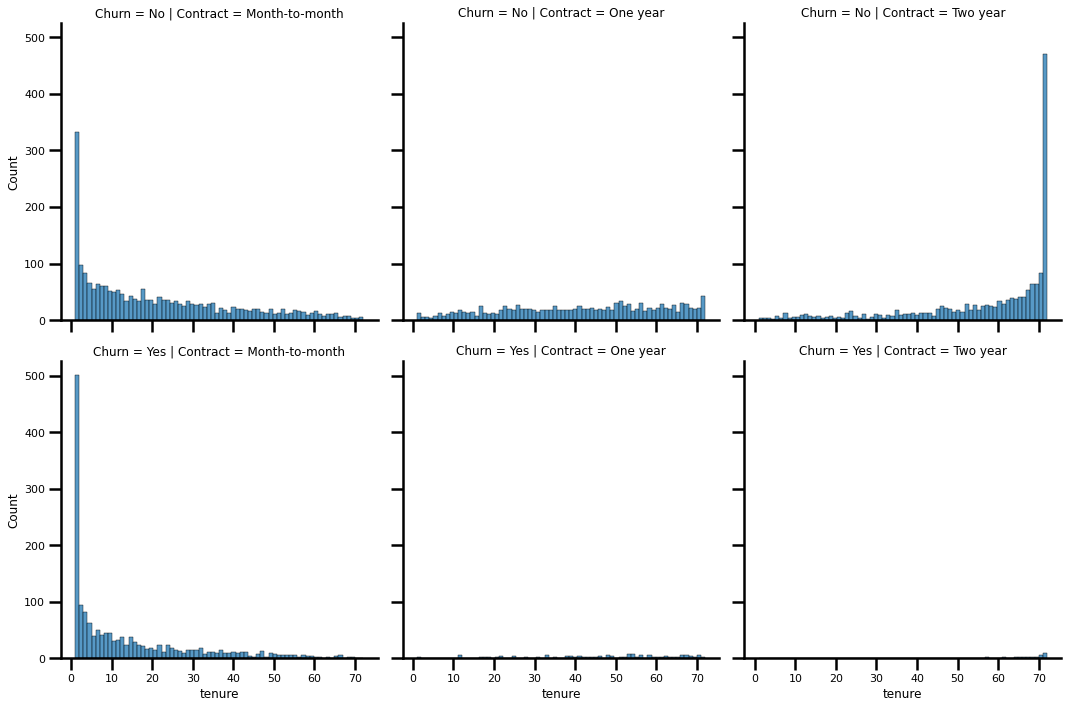

In [56]:
#CODE HERE
plt.figure(figsize=(9,6))
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')


<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

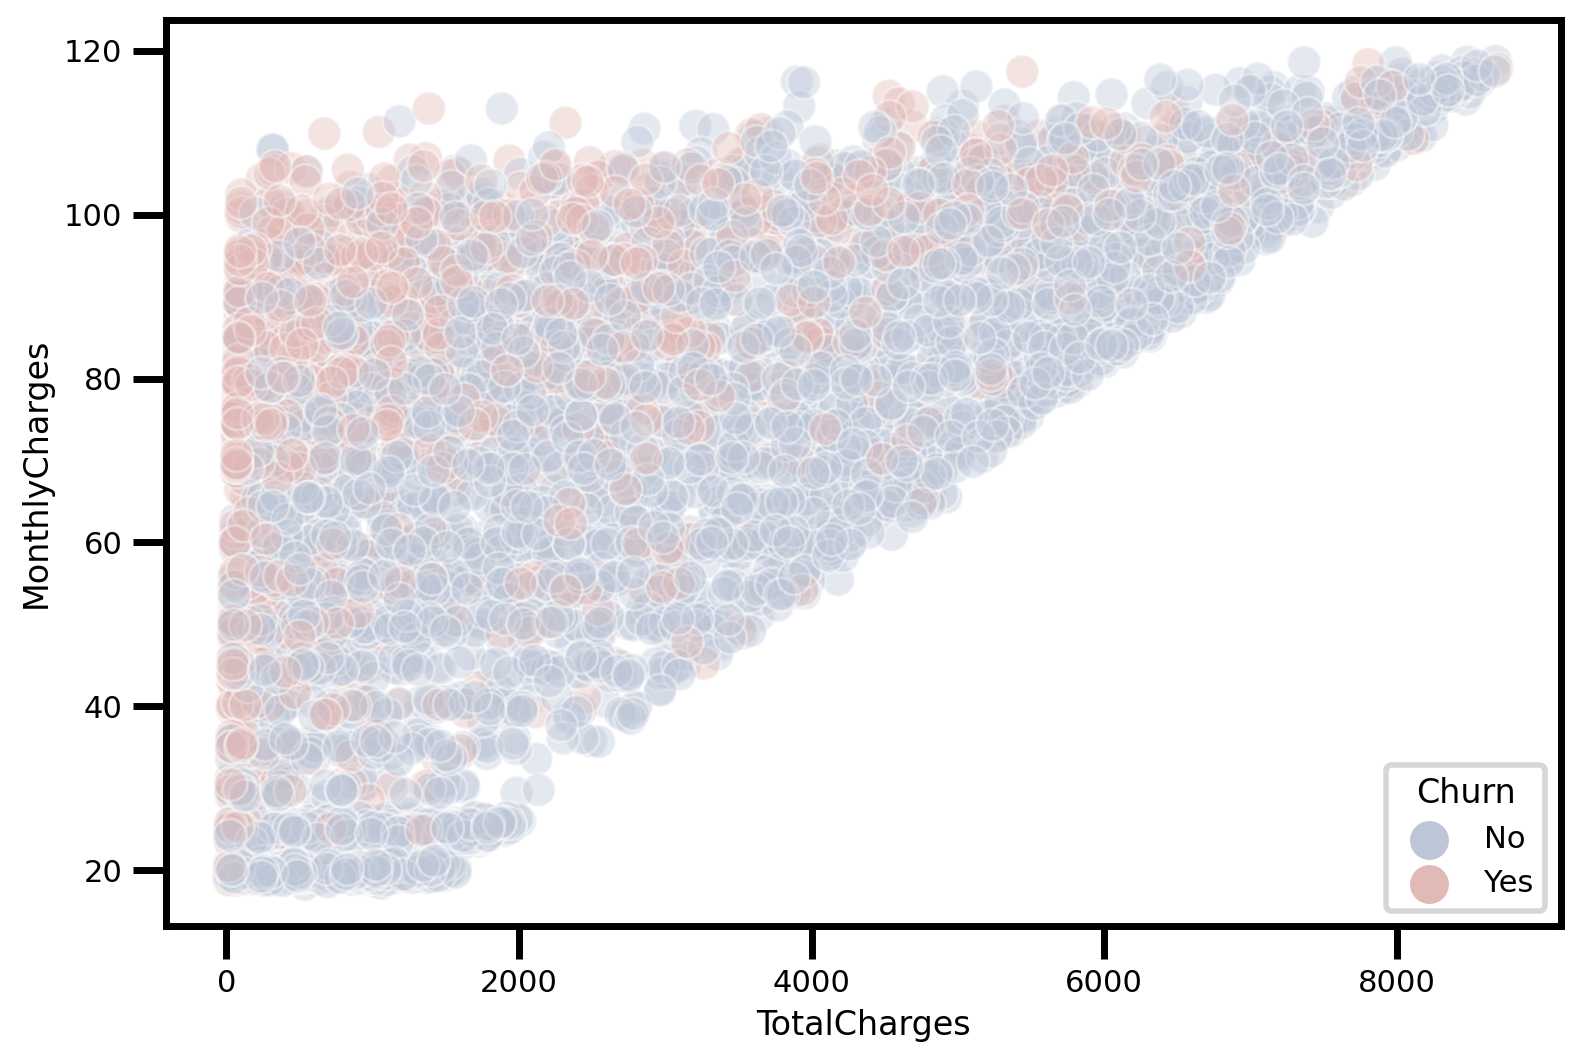

In [61]:
#CODE HERE
plt.figure(figsize=(9,6),dpi=200)
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn',palette='vlag',alpha=0.4)

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

<AxesSubplot:xlabel='tenure'>

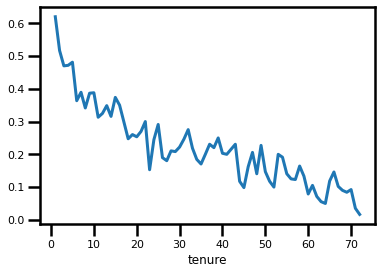

In [79]:
#CODE HERE
df['Churn'] = pd.get_dummies(df['Churn'])
values = df.groupby('tenure').mean()['Churn'].values
index =  df.groupby('tenure').mean()['Churn'].index
sns.lineplot(x=index,y=values)

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [ ]:
#CODE HERE

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [85]:
# CODE HERE
df['TenureCohort'] = pd.cut(x=df['tenure'], bins=[0,12,24,48,999],
                    labels=['0-12 Month', '12-24 Month', '24-48 Month','Over 48'
                           ])

In [86]:
df['TenureCohort']

0        0-12 Month
1       24-48 Month
2        0-12 Month
3       24-48 Month
4        0-12 Month
           ...     
7027    12-24 Month
7028        Over 48
7029     0-12 Month
7030     0-12 Month
7031        Over 48
Name: TenureCohort, Length: 7032, dtype: category
Categories (4, object): ['0-12 Month' < '12-24 Month' < '24-48 Month' < 'Over 48']

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

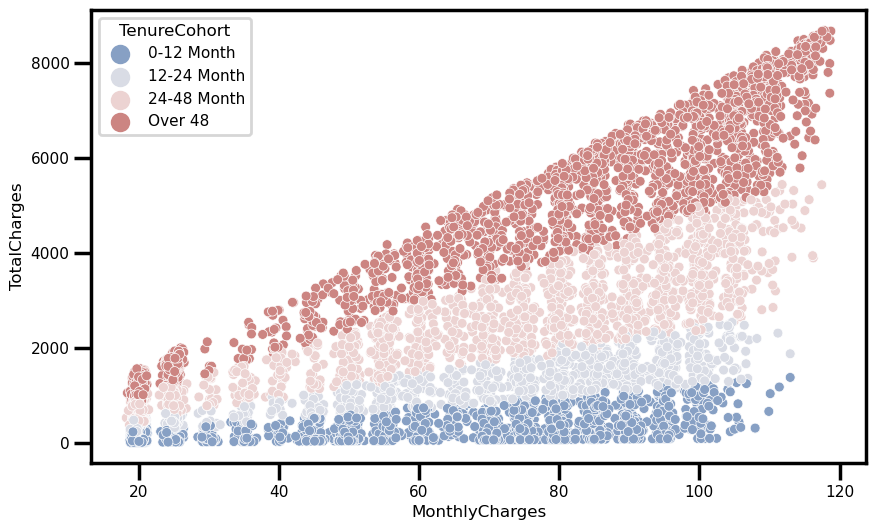

In [109]:
#CODE HERE
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(y='TotalCharges',x='MonthlyCharges',data=df,hue='TenureCohort',palette='vlag',linewidth=0.5,s=50)

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='TenureCohort', ylabel='count'>

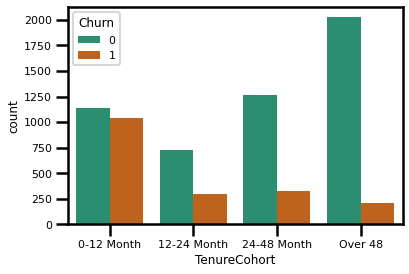

In [110]:
sns.countplot(x='TenureCohort',data=df,hue='Churn',palette='Dark2')
# CODE HERE

In [ ]:
sns

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

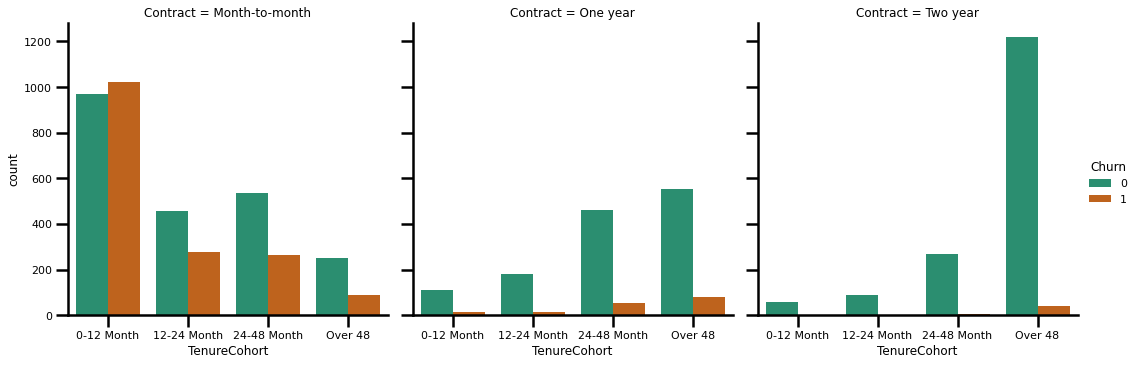

In [113]:
#CODE HERE
sns.catplot(x='TenureCohort',data=df,hue='Churn',palette='Dark2',col='Contract',kind='count')


<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [115]:
#CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [119]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TenureCohort'],
      dtype='object')

In [122]:
X = df.drop(['customerID','Churn'],axis=1)
X= pd.get_dummies(X)
y=df['Churn']

In [123]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [125]:
from sklearn.model_selection import GridSearchCV

In [ ]:
DecisionTreeClassifier()

In [143]:
param_grid = {'max_depth':[2,3,4,5,10,15,20,25]}


grid_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                          param_grid=param_grid,
                          cv=5)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 25]})

In [144]:
indexes = [2,3,4,5,10,15,20,25]
values= pd.DataFrame(grid_model.cv_results_)[['params','mean_test_score']]

In [145]:
values['mean_test_score']

0    0.762961
1    0.785871
2    0.788243
3    0.792985
4    0.759958
5    0.726772
6    0.725506
7    0.727245
Name: mean_test_score, dtype: float64

<AxesSubplot:ylabel='mean_test_score'>

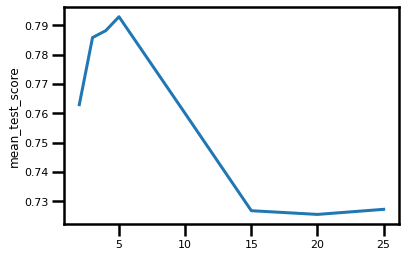

In [146]:
sns.lineplot(x=indexes,y=values['mean_test_score'])

In [147]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix ,plot_confusion_matrix

preds = model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.54      0.49      0.51       147

    accuracy                           0.81       704
   macro avg       0.70      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



<Figure size 900x500 with 0 Axes>

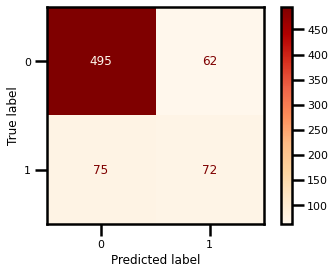

In [160]:
plt.figure(figsize=(9,5),dpi=100)
plot_confusion_matrix(model,X_test,y_test,cmap='OrRd')

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [161]:
from sklearn.tree import plot_tree

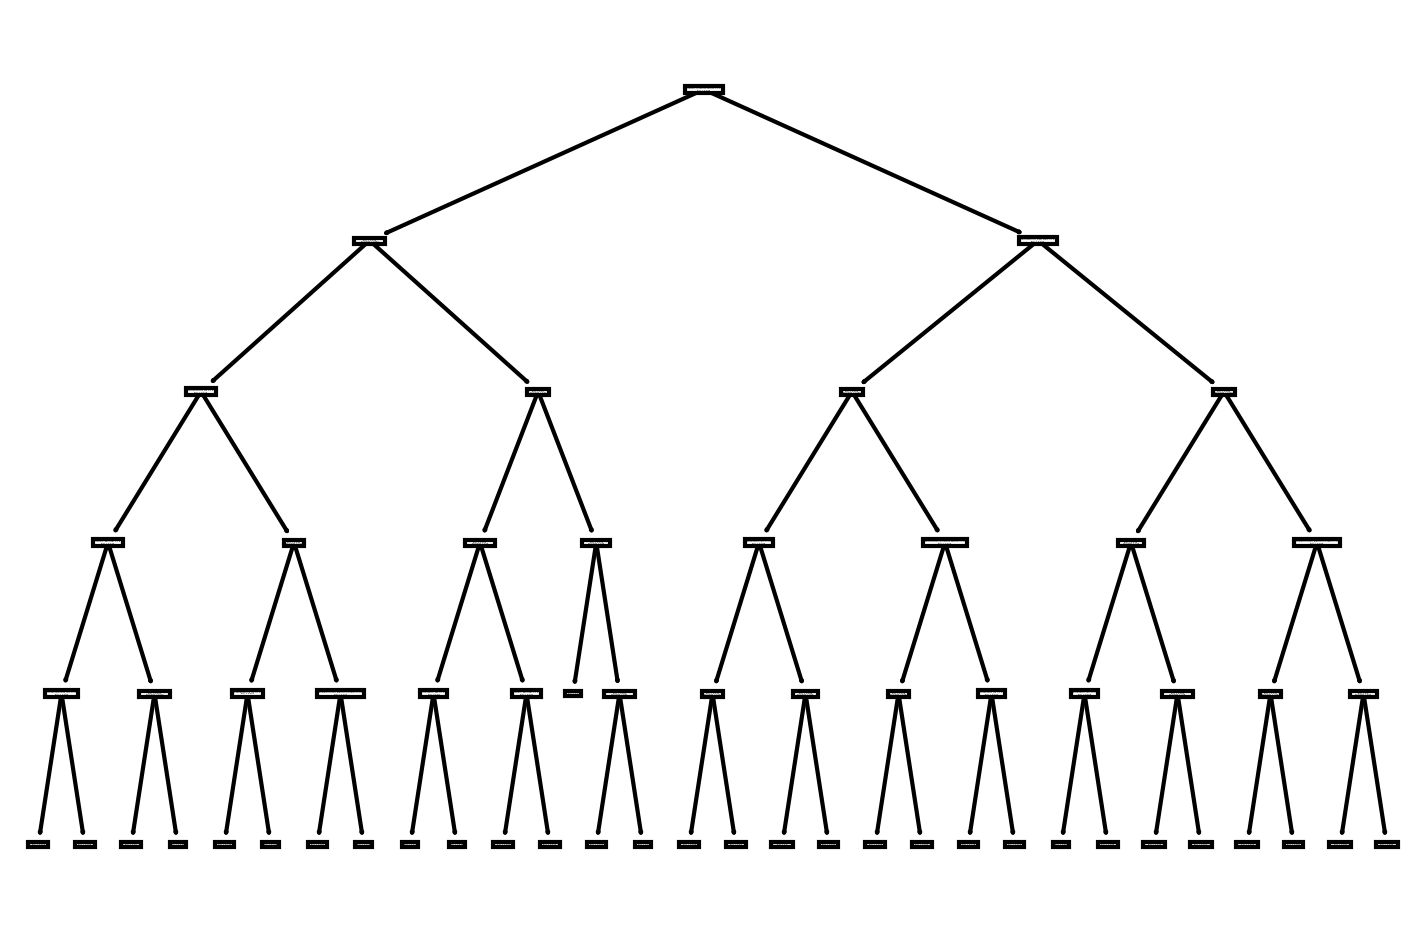

In [170]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=False,feature_names=X.columns,);

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [173]:
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gdc = GradientBoostingClassifier()

In [186]:
ensemble_clf=[rfc,ada,gdc] 

params1={"max_depth": range(5,30,5)}
params2={"learning_rate":[0.001,0.01,0.1]}
params3={"learning_rate":[0.001,0.01,0.1]}

parameters_list=[params1, params2, params3]
model_log=["_rf", "_ex", "_gb", "_svc"]

In [187]:
for i in range(len(ensemble_clf)):
    Grid=GridSearchCV(estimator=ensemble_clf[i], param_grid=parameters_list[i]).fit(X_train,y_train)
    pred = Grid.predict(X_test)
    Grid.cv
    print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.58      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       557
           1       0.62      0.38      0.47       147

    accuracy                           0.82       704
   macro avg       0.74      0.66      0.68       704
weighted avg       0.80      0.82      0.81       704

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [ ]:
AdaBoostClassifier()

In [194]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://stackoverflow.com/questions/58781601/parameter-tuning-using-gridsearchcv-for-gradientboosting-classifier-in-python

model_params = {
    'rfc': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators':[10,50],
            
            'min_samples_leaf': [1],
            
        }  
    },
    'ada': {
        'model': AdaBoostClassifier(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators':[10,50]
        }
    },
    'gbc' : {
        'model': GradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.1],
            'n_estimators':[10]
        
            
        }
    }
}

In [193]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result= pd.DataFrame(scores,columns=['model','best_score','best_params'])
result

,model,best_score,best_params
0,rfc,0.796934,"{'min_samples_leaf': 4, 'n_estimators': 50}"
1,ada,0.802624,"{'learning_rate': 0.1, 'n_estimators': 250}"
2,gbc,0.800569,"{'learning_rate': 0.1, 'n_estimators': 50}"


-------- RandomForestClassifier ----------

BEST PARAMETERS ==> {'min_samples_leaf': 1, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       557
           1       0.48      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.79      0.78       704
 

-------- AdaBoostClassifier ----------

BEST PARAMETERS ==> {'learning_rate': 0.1, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       557
           1       0.62      0.38      0.47       147

    accuracy                           0.82       704
   macro avg       0.74      0.66      0.68       704
weighted avg       0.80      0.82      0.81       704
 

-------- GradientBoostingClassifier ----------

BEST PARAMETERS ==> {'learning_rate': 0.1, 'n_estimators': 10}
              precis

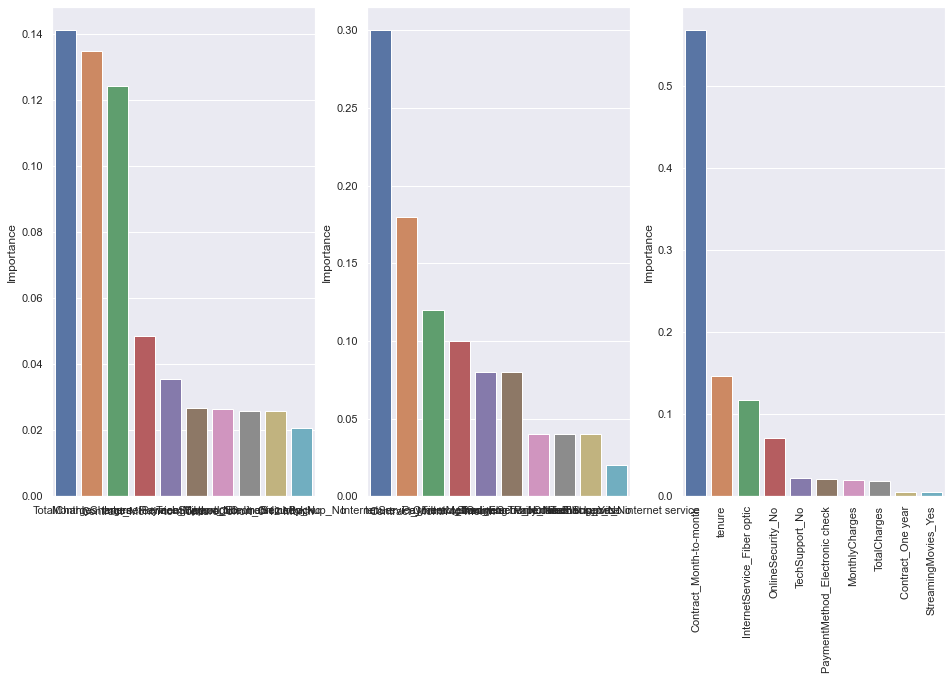

In [230]:
i=0
f, axes = plt.subplots(1,3)
sns.set(rc={'figure.figsize':(16,9)})


for model_name, mp in model_params.items():
     
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    features = clf.best_estimator_.feature_importances_
    feat_data = pd.DataFrame(index=X.columns,data=features,columns=['Importance'])
    feat_data = feat_data.sort_values(by='Importance',ascending=False)[:10]
    
    predictions = clf.predict(X_test)
    print('--------',mp['model'].__class__.__name__,'----------\n')
    print('BEST PARAMETERS ==>',clf.best_params_)
    #print(pd.DataFrame(clf.cv_results_)[['params','mean_test_score','mean_score_time']].sort_values(by='mean_score_time'))
    print(classification_report(y_test,predictions),'\n')
    
    sns.barplot(data=feat_data,x=feat_data.index,y='Importance',ax=axes[i])
    i=i+1
    
    
plt.xticks(rotation=90)  ;